### 과대적합과 과소적합
![image](images/과대_과소적합-1.png)
#### 과대적합(overfitting)
* 훈련데이터에만 잘 맞고 테스트데이터에는 낮은 정답률이 나오는 경우
![image](images/과대적합.png)
>

#### 과소적합(underfitting)
* 훈련이 제대로 이루어지지 않아 테스트 데이터보다 훈련데이터의 정답률이 낮은 경우
* 훈련, 테스트데이터 모두 정답률이 낮은 경우
* 훈련데이터의 개수가 적을 경우
![image](images/과소적합.png)

### 스케일링
* 수치형 데이터들의 값의 범위가 클 경우 사용한다.(연산 속도 증가)
    - 예를 들어 주식의 가격을 생각했을 경우 100원의 1%와 100000원의 1%를 계산하고자 한다면 같은 1%연산이지만 숫자가 클 경우 연산속도에 영향을 미치게 된다.
* 서로 다른 변수의 값 범위를 일정한 수준으로 맞추고자 하는 경우
* 대표적 스케일링 클래스는 StandardScaler, MinMaxScaler이 있다
* 사용 이유
    - 연산속도를 올릴 수 있다
    - 확률을 높일 수 있다
    - 과대, 과소적합을 조금은 해결할 수 있다
* 참고
    - 이상치가 있을 경우 범위의 차이가 커지게 되므로 이상치는 제거해야 한다
    - Ensemble는 따로 스케일링 할 필요가 없다
    

#### StandardScaler(label값은 스케일 하지 않는다)
* 사이킷런에서 서포트벡터머신, 선형회귀, 로지스틱 회귀에 적용하는 것이 예측 성능 향상에 중요한 요소가 된다.
* 각 특성의 평균을 0, 편차를 1로 변경하여 정규분포로 만드는 것이다
    - 편차(deviation)는 예측값과 평균의 차이
    > ![image](images/정규분포.png)

#### MinMaxScaler(label값은 스케일 하지 않는다)
* 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경
* k-means, k-nearest neighbor등의 알고리즘에 좋은 성능을 보인다

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

movie = {'daum':[2,4,6,8,10], 'naver':[1,2,3,4,5]}

mv = pd.DataFrame(movie)
mv

,daum,naver
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [4]:
standard_scaler = StandardScaler()
scaler = standard_scaler.fit_transform(mv)
pd.DataFrame(data=scaler, columns=['daum','naver'])

,daum,naver
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


In [5]:
round( scaler.mean(), 2) ,round(scaler.std(),2)

(0.0, 1.0)

In [6]:
from sklearn.preprocessing import MinMaxScaler

min_max_sc = MinMaxScaler()
data = min_max_sc.fit_transform(mv)
pd.DataFrame( data, columns= ['daum', 'naver'])

,daum,naver
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


### bank 스케일링

In [7]:
df = pd.read_csv('data/bank_cleaning.csv')
df.head()

,age,duration,campaign,pdays,previous,y
0,56,261,1,999,0,0
1,57,149,1,999,0,0
2,37,226,1,999,0,0
3,40,151,1,999,0,0
4,56,307,1,999,0,0


In [8]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [9]:
features = ['age', 'duration', 'campaign', 'pdays', 'previous']
label = 'y'
#문제와 정답 구분
X, y = df[features], df[label]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
                        train_test_split(X, y , test_size=0.2)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print('학습 데이터 : ', rfc.score(X_train, y_train))
print('test 데이터 : ', rfc.score(X_test, y_test))


학습 데이터 :  0.9905918057663126
test 데이터 :  0.8862588006797767


In [16]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit( X_train, y_train )
print('학습 데이터 : ', kn.score(X_train, y_train))
print('test 데이터 : ', kn.score(X_test, y_test))

학습 데이터 :  0.9214264036418817
test 데이터 :  0.9003398883224083


### 스케일

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler =scaler.transform(X_test)

rfc.fit(X_train_scaler, y_train)
kn.fit(X_train_scaler, y_train)

print('------랜덤 포레스트------')
print('학습데이터 : ', rfc.score(X_train_scaler, y_train))
print('학습데이터 : ', rfc.score(X_test_scaler, y_test))
print('------knn------')
print('학습데이터 : ', kn.score(X_train_scaler, y_train))
print('학습데이터 : ', kn.score(X_test_scaler, y_test))

------랜덤 포레스트------
학습데이터 :  0.9905918057663126
학습데이터 :  0.8854090798737557
------knn------
학습데이터 :  0.9208801213960546
학습데이터 :  0.8971837824714737


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

rfc.fit(X_train_scaler, y_train)
kn.fit(X_train_scaler, y_train)

print('------랜덤 포레스트------')
print('학습데이터 : ', rfc.score(X_train_scaler, y_train))
print('학습데이터 : ', rfc.score(X_test_scaler, y_test))
print('------knn------')
print('학습데이터 : ', kn.score(X_train_scaler, y_train))
print('학습데이터 : ', kn.score(X_test_scaler, y_test))

------랜덤 포레스트------
학습데이터 :  0.9905614567526555
학습데이터 :  0.887836853605244
------knn------
학습데이터 :  0.921669195751138
학습데이터 :  0.8947560087399854


In [23]:
import sklearn.svm as svm

svm_r = svm.SVC(kernel = 'rbf')
svm_r.fit(X_train, y_train)

print(svm_r.score(X_train, y_train))
print(svm_r.score(X_test, y_test))

0.9052807283763278
0.9037387715464918


In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler =scaler.transform(X_test)

svm_r.fit(X_train_scaler, y_train)

print(svm_r.score(X_train_scaler, y_train))
print(svm_r.score(X_test_scaler, y_test))

0.9070409711684371
0.9036173828599174


### 상관관계
* 특정 변수들 끼리의 상관관계가 높은 값을 제거하면 과적합을 줄일 수 있다

In [26]:
df.corr()

,age,duration,campaign,pdays,previous,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,0.230181
y,0.030399,0.405274,-0.066357,-0.324914,0.230181,1.000000


<AxesSubplot:>

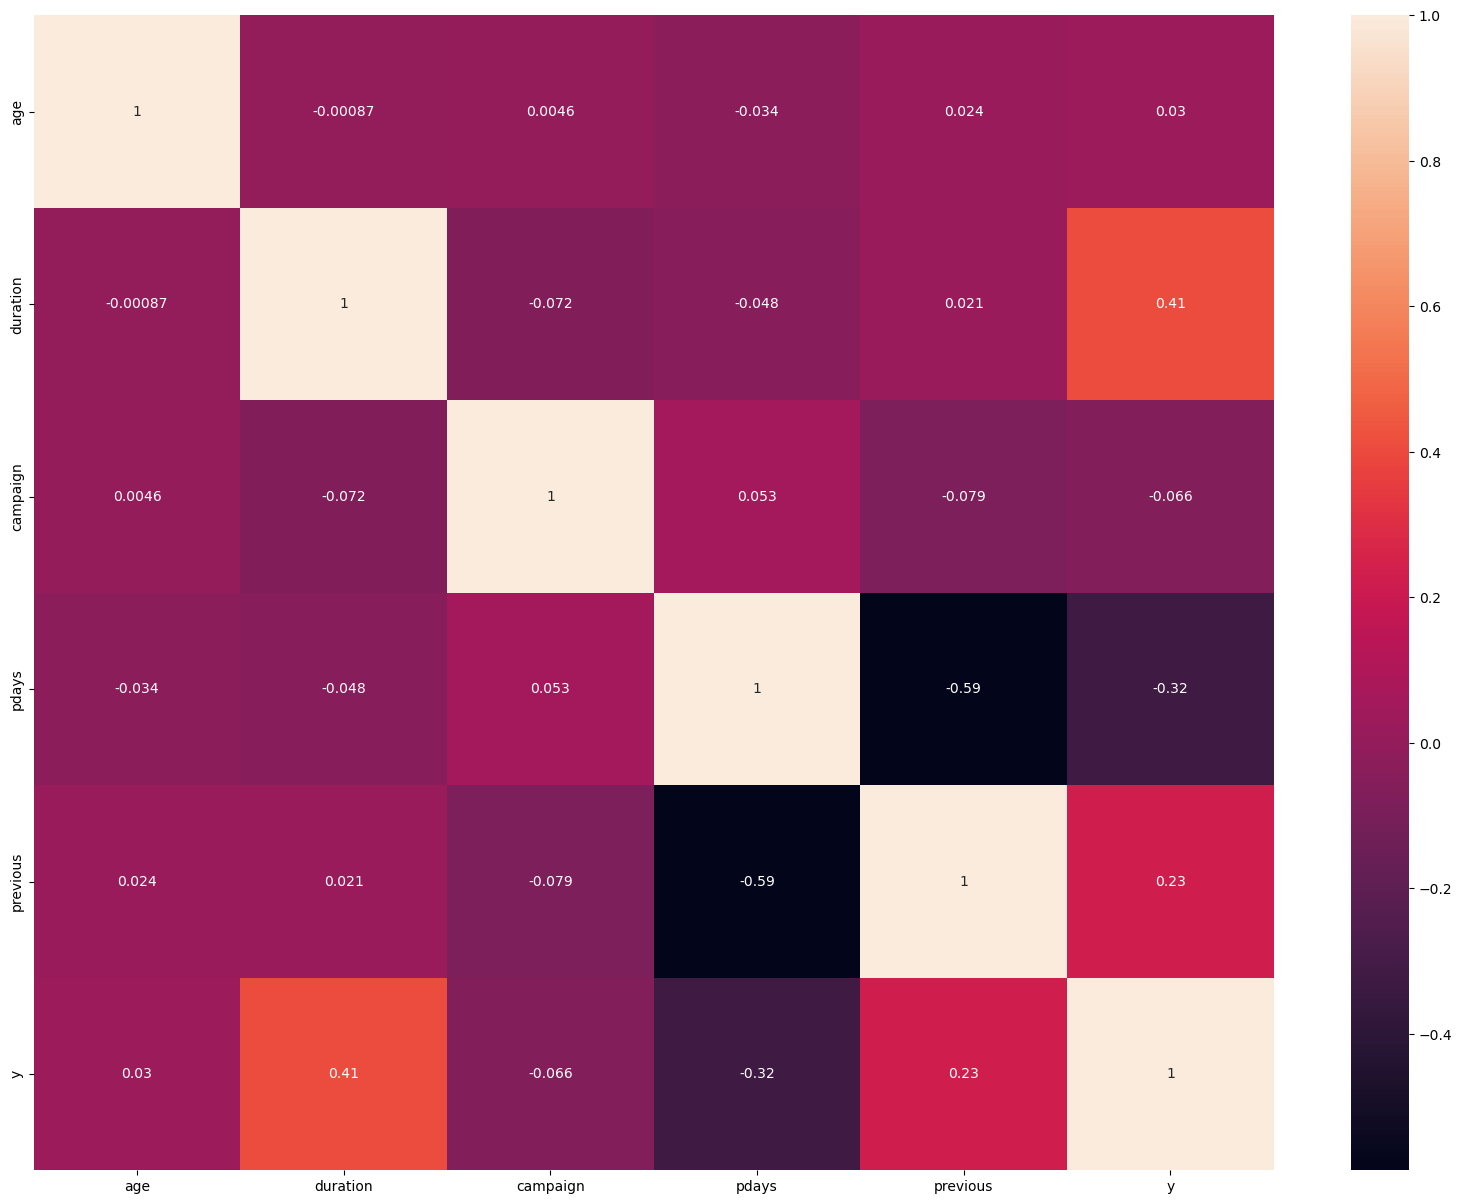

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
fig.set_size_inches(20,15)
sns.heatmap( df.corr(), annot=True)

In [33]:
f = ['age','duration','campaign', 'pdays','previous']
label ='y'
X, y = df[f], df[label]
X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('------랜덤 포레스트------')
print('학습데이터 : ', rfc.score(X_train_scaler, y_train))
print('학습데이터 : ', rfc.score(X_test_scaler, y_test))
print('------knn------')
print('학습데이터 : ', kn.score(X_train_scaler, y_train))
print('학습데이터 : ', kn.score(X_test_scaler, y_test))

------랜덤 포레스트------
학습데이터 :  0.8879514415781488
학습데이터 :  0.8849235251274581
------knn------
학습데이터 :  0.40482549317147193
학습데이터 :  0.41332847778587034
